# 생선 분류 인공지능

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/1-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 데이터 준비

### 연어 데이터 준비하기

In [2]:
salmon_length  = [ 25.4 , 26.3 , 26.5 , 29.0 , 29.0 , 29.7 , 29.7 , 30.0 , 30.0 , 30.7 , 31.0 , 31.0 , 31.5 , 32.0 , 32.0 , 32.0 , 33.0 , 33.0 , 33.5 , 33.5 , 34.0 , 34.0 , 34.5 , 35.0 , 35.0 , 35.0 , 35.0 , 36.0 , 36.0 , 37.0 , 38.5 , 38.5 , 39.5 , 41.0 , 41.0, 41.5, 41.5, 41.5, 42.0, 42.0 ]
salmon_weight  = [ 242.0 , 290.0 , 340.0 , 363.0 , 430.0 , 450.0 , 500.0 , 390.0 , 450.0 , 500.0 , 475.0 , 500.0 , 500.0 , 340.0 , 600.0 , 600.0 , 700.0 , 700.0 , 610.0 , 650.0 , 575.0 , 685.0 , 620.0 , 680.0 , 700.0 , 725.0 , 720.0 , 714.0 , 850.0 , 1000.0 , 920.0 , 955.0 , 925.0 , 975.0 , 950.0, 980.0, 995.0, 990.0, 1000.0, 1005.0 ]



### 산점도

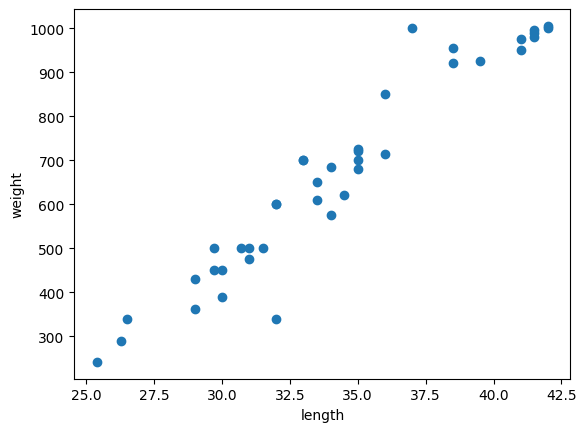

In [3]:
import matplotlib.pyplot as plt # matplotlib의 pyplot 함수를 plt로 줄여서 사용

plt.scatter(salmon_length, salmon_weight)
plt.xlabel('length') # x축은 길이
plt.ylabel('weight') # y축은 무게
plt.show()

### 빙어 데이터 준비하기

In [4]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 14.8, 15.0, 15.2]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.8, 19.9, 20.1]

### 산점도

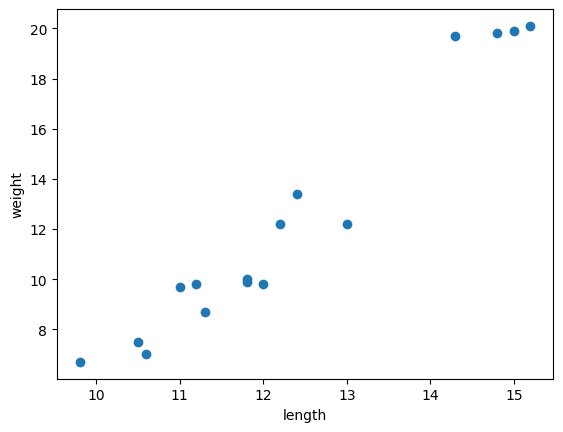

In [5]:
plt.scatter(smelt_length, smelt_weight) # 빙어 데이터 산점도
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 연어와 빙어 산점도

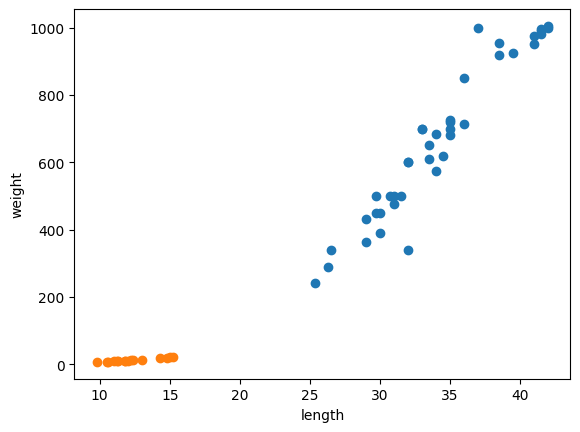

In [6]:
plt.scatter(salmon_length, salmon_weight) # 연어 데이터 산점도
plt.scatter(smelt_length, smelt_weight) # 빙어 데이터 산점도
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 첫 번째 머신러닝 프로그램
### 연어와 빙어 데이터 합치기

In [7]:
fish_length = salmon_length+smelt_length
fish_weight = salmon_weight+smelt_weight
print(fish_length)
print(fish_weight)

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 41.5, 41.5, 41.5, 42.0, 42.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 14.8, 15.0, 15.2]
[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 980.0, 995.0, 990.0, 1000.0, 1005.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.8, 19.9, 20.1]


### 넘파이로 2차원 리스트 만들기

In [8]:
import numpy as np
fish_data = np.column_stack((fish_length, fish_weight)) # column_stack() 함수는 전달받은 리스트를 일렬로 세운 다음 차례대로 연결
print(fish_data)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [  41.5  980. ]
 [  41.5  995. ]
 [  41.5  990. ]
 [  42.  1000. ]
 [  42.  1005. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  14.8   19.8]
 [  15.    19.9]
 [  15.2   20.1]]


### 정답 데이터 생성

In [9]:
fish_target = np.concatenate((np.ones(40), np.zeros(16)))  # ones(), zeros() 함수는 각각 원하는 개수의 1과 0을 채운 배열을 만들어 줌
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


### 사이킷런으로 훈련 세트와 테스트 세트 나누기

In [10]:
from sklearn.model_selection import train_test_split # train_test_split()함수는 비율에 맞게 훈련 세트와 테스트 세트로 나눔

In [11]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42, test_size=0.25)
# 기본적으로 25%를 테스트 세트로 분류, stratify 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 나눔

In [12]:
print(train_input.shape, test_input.shape) # 입력 데이터의 크기를 출력

(42, 2) (14, 2)


In [13]:
print(train_target.shape, test_target.shape)

(42,) (14,)


### 모델 생성 및 학습

In [14]:
from sklearn.neighbors import KNeighborsClassifier # 파이썬 패키지 전체를 임포트하지 않고 특정 클래스만 임포트하려면 from~import 구문 사용

In [15]:
kn = KNeighborsClassifier() # 객체를 먼저 생성

In [16]:
kn.fit(train_input, train_target) # 도미를 찾을 기준을 학습, fit 메서드가 이런 역활을 수행

KNeighborsClassifier()

### 모델 평가

In [17]:
kn.score(test_input, test_target) # 모델을 평가하는 메서드는 score() 메서드로 0에서1 사이의 값을 반환

1.0

### 새로운 데이터의 산점도 위치

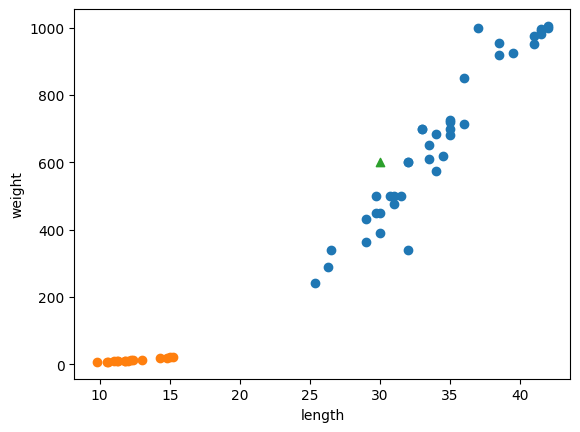

In [18]:
plt.scatter(salmon_length, salmon_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 새로운 데이터로 예측된 결과

In [19]:
kn.predict([[30, 600]])

array([1.])

In [20]:
kn.predict([[1, 200]])

array([1.])